In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp


In [2]:
# Leer el archivo CSV con el dataset procesado por el ETL
df = pd.read_csv('resultado_etl.csv')

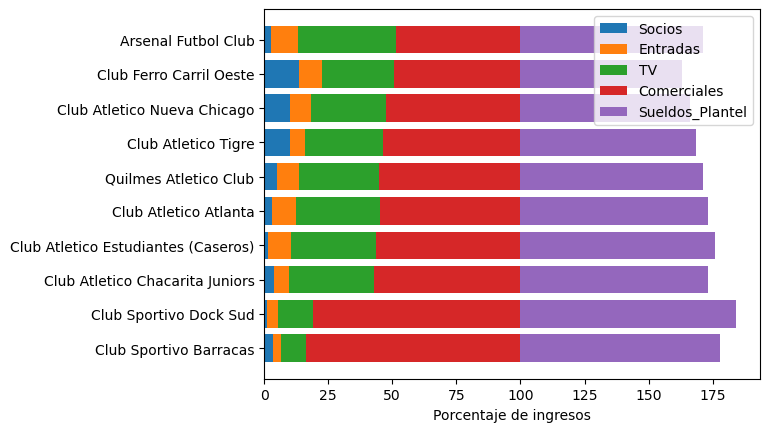

In [3]:
# Calcular el campo "Ingresos totales"
df["Ingresos_Totales"] = df["Ingresos_Socios"] + df["Ingresos_Entradas"] + df["Ingresos_TV"] + df["Ingresos_Comerciales"]

# Calcular el porcentaje de ingresos por cada fuente
df["Porcentaje_Ingresos_Socios"] = df["Ingresos_Socios"] / df["Ingresos_Totales"] * 100
df["Porcentaje_Ingresos_Entradas"] = df["Ingresos_Entradas"] / df["Ingresos_Totales"] * 100
df["Porcentaje_Ingresos_TV"] = df["Ingresos_TV"] / df["Ingresos_Totales"] * 100
df["Porcentaje_Ingresos_Comerciales"] = df["Ingresos_Comerciales"] / df["Ingresos_Totales"] * 100

# Calcular el porcentaje del Sueldo_Plantel
df["Porcentaje_Sueldos_Plantel"] = df["Sueldos_Plantel"] / df["Ingresos_Totales"] * 100

# Crear un gráfico de barras horizontal con los porcentajes de ingresos por cada fuente y el porcentaje del Sueldo_Plantel
fig, ax = plt.subplots()
ax.barh(df["Nombre_Club"], df["Porcentaje_Ingresos_Socios"], label="Socios")
ax.barh(df["Nombre_Club"], df["Porcentaje_Ingresos_Entradas"], left=df["Porcentaje_Ingresos_Socios"], label="Entradas")
ax.barh(df["Nombre_Club"], df["Porcentaje_Ingresos_TV"], left=df["Porcentaje_Ingresos_Socios"]+df["Porcentaje_Ingresos_Entradas"], label="TV")
ax.barh(df["Nombre_Club"], df["Porcentaje_Ingresos_Comerciales"], left=df["Porcentaje_Ingresos_Socios"]+df["Porcentaje_Ingresos_Entradas"]+df["Porcentaje_Ingresos_TV"], label="Comerciales")
ax.barh(df["Nombre_Club"], df["Porcentaje_Sueldos_Plantel"], left=df["Porcentaje_Ingresos_Socios"]+df["Porcentaje_Ingresos_Entradas"]+df["Porcentaje_Ingresos_TV"]+df["Porcentaje_Ingresos_Comerciales"], label="Sueldos_Plantel")
ax.set_xlabel("Porcentaje de ingresos")
ax.legend()
plt.show()


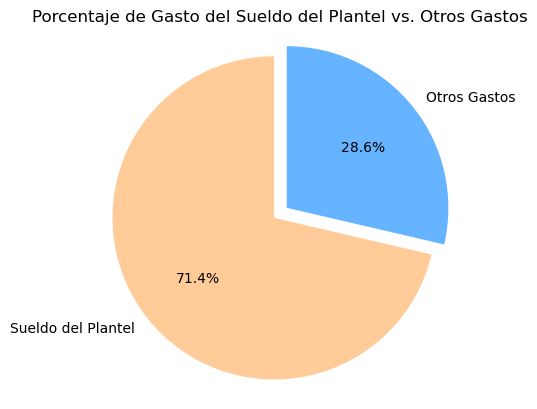

In [4]:
kpi_sueldo = (df['Sueldos_Plantel'].sum() / df['Egresos_Totales'].sum()) * 100
kpi_otros_gastos = 100 - kpi_sueldo

labels = ['Sueldo del Plantel', 'Otros Gastos']
sizes = [kpi_sueldo, kpi_otros_gastos]
colors = ['#ffcc99', '#66b3ff']
explode = (0.1, 0)  # Resaltar la primera porción (Sueldo del Plantel)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Porcentaje de Gasto del Sueldo del Plantel vs. Otros Gastos')
plt.show()

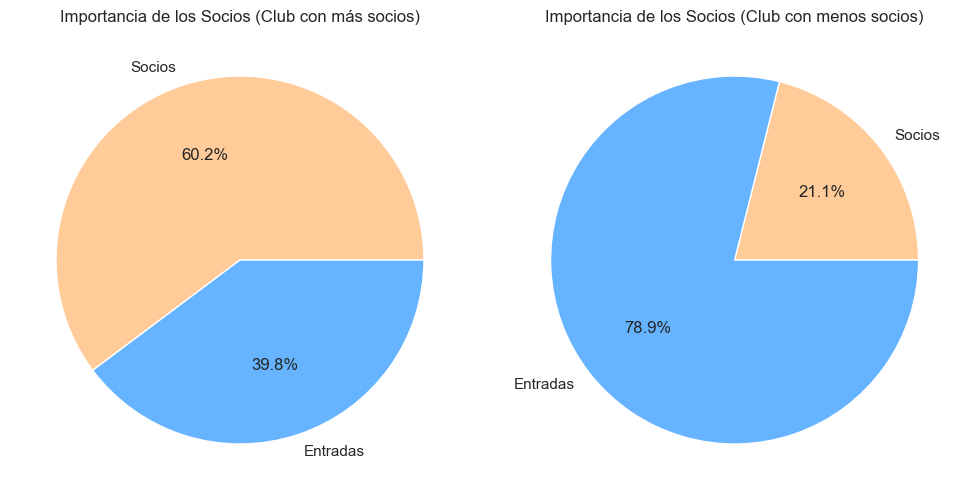

In [41]:
import matplotlib.pyplot as plt

# Obtener los datos de los clubes
club_mas_socios = df[df['Socios'] == df['Socios'].max()]
club_menos_socios = df[df['Socios'] == df['Socios'].min()]

# Calcular los porcentajes de los ingresos de los socios
porcentaje_mas_socios = [club_mas_socios['Ingresos_Socios'].values[0], club_mas_socios['Entradas_Vendidas'].values[0] * club_mas_socios['Valor_Entradas_Promedio'].values[0]]
porcentaje_menos_socios = [club_menos_socios['Ingresos_Socios'].values[0], club_menos_socios['Entradas_Vendidas'].values[0] * club_menos_socios['Valor_Entradas_Promedio'].values[0]]

# Configurar los datos para el gráfico de torta
labels = ['Socios', 'Entradas']
colors = ['#ffcc99', '#66b3ff']

# Generar el gráfico de torta
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(porcentaje_mas_socios, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Importancia de los Socios (Club con más socios)')

axs[1].pie(porcentaje_menos_socios, labels=labels, colors=colors, autopct='%1.1f%%')
axs[1].set_title('Importancia de los Socios (Club con menos socios)')

plt.tight_layout()
plt.show()

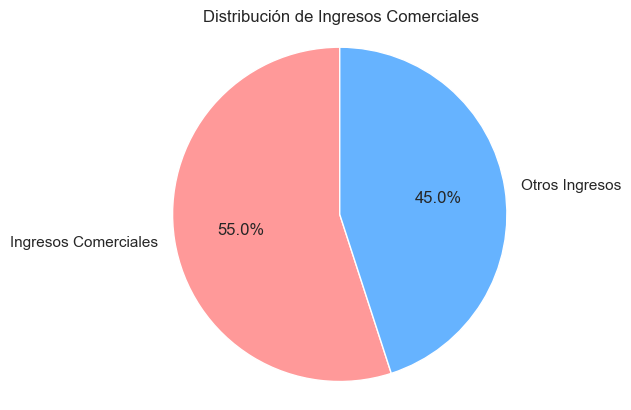

In [38]:
kpi_ingresos_comerciales = (df['Ingresos_Comerciales'].sum() / df['Ingresos_Totales'].sum()) * 100

labels = ['Ingresos Comerciales', 'Otros Ingresos']
sizes = [kpi_ingresos_comerciales, 100 - kpi_ingresos_comerciales]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Ingresos Comerciales')
plt.show()

In [8]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, subplot_titles=("Sueldos del plantel", "Ingresos comerciales", "Socios"))

fig.add_trace(go.Bar(x=df["Nombre_Coloquial"], y=df["Sueldos_Plantel"], name="Sueldos del plantel"), row=1, col=1)
fig.add_trace(go.Bar(x=df["Nombre_Coloquial"], y=df["Porcentaje_Ingresos_Comerciales"], name="Ingresos comerciales"), row=2, col=1)
fig.add_trace(go.Bar(x=df["Nombre_Coloquial"], y=df["Socios"], name="Socios"), row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Panel de control de clubes de fútbol")
fig.show()


Posibles soluciones a estos 3 indicadores de crecimiento

Sueldo del plantel:

Implementar una política salarial basada en el rendimiento, donde los jugadores sean recompensados en función de su desempeño y contribución al éxito del equipo.
Establecer cláusulas contractuales que incentiven la reducción de salarios en caso de bajo rendimiento o lesiones prolongadas.
Realizar un análisis detallado de los costos asociados al plantel, identificando áreas de optimización y explorando la posibilidad de incorporar jugadores jóvenes provenientes de las divisiones inferiores.

Ingresos comerciales:

Explotar el potencial de los medios digitales para generar ingresos comerciales a través de acuerdos de patrocinio con marcas relevantes y promociones en línea.
Diversificar las fuentes de ingresos comerciales explorando oportunidades de licenciamiento de productos, contratos de merchandising y acuerdos de colaboración con empresas relacionadas.
Potenciar la venta de espacios publicitarios en el estadio, en el kit de juego del equipo y en otros activos digitales del club.

Socios:

Implementar estrategias de marketing digital para promover la afiliación de socios a través de redes sociales, anuncios en línea y campañas por correo electrónico.
Realizar eventos exclusivos para socios, como encuentros con jugadores, visitas al vestuario o acceso privilegiado a entrenamientos.
Establecer programas de referidos, donde los socios actuales obtengan beneficios por recomendar a nuevos socios.
